In [205]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [206]:
dataset=pd.read_csv("car data.csv")
dataset.head(5)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


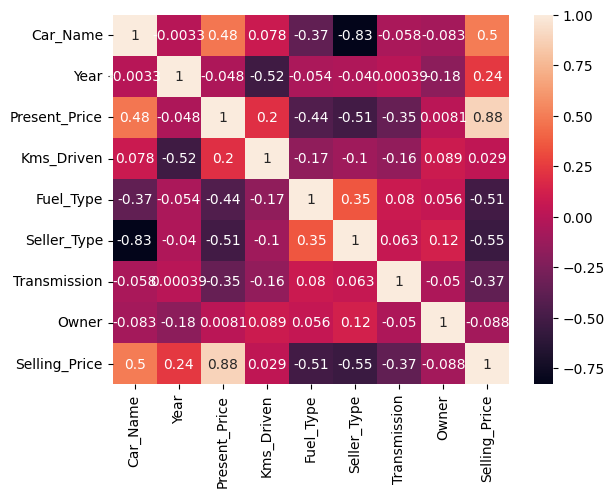

In [357]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

DATA CLEANING

In [207]:
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [208]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [353]:
lc1=LabelEncoder()
dataset["Car_Name"]=lc1.fit_transform(dataset["Car_Name"])

In [354]:
lc2=LabelEncoder()
dataset["Fuel_Type"]=lc2.fit_transform(dataset["Fuel_Type"])

In [355]:
lc3=LabelEncoder()
dataset["Seller_Type"]=lc3.fit_transform(dataset["Seller_Type"])

In [356]:
lc4=LabelEncoder()
dataset["Transmission"]=lc4.fit_transform(dataset["Transmission"])

In [358]:
dataset.head(5)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25
3,96,2011,4.15,5200,2,0,1,0,2.85
4,92,2014,6.87,42450,1,0,1,0,4.60


In [359]:
x=dataset.iloc[:,:-1]
y=dataset["Selling_Price"]

In [360]:
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [361]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.072210,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.189171,-0.217514,0.221505,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.214494,1.168129,0.257427,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.306132,-0.910335,-0.403079,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.150184,0.128897,-0.087890,0.141743,-1.852241,-0.737285,0.39148,-0.174501
...,...,...,...,...,...,...,...,...
296,0.253481,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.39148,-0.174501
297,0.136520,0.475308,-0.200292,0.593804,0.500183,-0.737285,0.39148,-0.174501
298,0.253481,-1.603156,0.390687,1.313340,0.500183,-0.737285,0.39148,-0.174501
299,0.253481,1.168129,0.564504,-0.719876,-1.852241,-0.737285,0.39148,-0.174501


In [362]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [363]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [364]:
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(98.35441060148557, 96.67477298012108)

In [365]:
mean_squared_error(y_test,rf.predict(x_test)),mean_absolute_error(y_test,rf.predict(x_test))

(0.7659854806557386, 0.5592000000000005)

In [366]:
rf.predict([[1.072210,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501]])

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.841])